In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
from bokeh.models import HoverTool
from bokeh.palettes import Spectral5
from bokeh.models import ColorBar, ColumnDataSource, HoverTool, Range1d
from bokeh.models import BoxZoomTool, LassoSelectTool, WheelZoomTool 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [129]:
# Load data
df = pd.read_csv('dataset.csv')

# Data preparation Adding Columns
df['TotalSales'] = df.groupby('MarketID')['SalesInThousands'].transform('sum')
df['AvgWeeklySales'] = df.groupby('MarketID')['SalesInThousands'].transform('mean')
print(df.head())

   MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
0         1     Medium           1           4          3     1   
1         1     Medium           1           4          3     2   
2         1     Medium           1           4          3     3   
3         1     Medium           1           4          3     4   
4         1     Medium           2           5          2     1   

   SalesInThousands  TotalSales  AvgWeeklySales  
0             33.73     1825.29       35.101731  
1             35.67     1825.29       35.101731  
2             29.03     1825.29       35.101731  
3             39.25     1825.29       35.101731  
4             27.81     1825.29       35.101731  


In [130]:
# Create dummy variables for promotions
df = pd.get_dummies(df, columns=['Promotion'])

# Analysis
# Overall metrics
print(df.groupby('Promotion_1')['TotalSales'].sum())
print(df.groupby('Promotion_2')['AvgWeeklySales'].mean())

# Statistical tests
f, p = stats.f_oneway(df[df['Promotion_1']==1]['TotalSales'],
                      df[df['Promotion_2']==1]['TotalSales'])


Promotion_1
False    1281890.08
True      585882.52
Name: TotalSales, dtype: float64
Promotion_2
False    54.366208
True     51.742793
Name: AvgWeeklySales, dtype: float64


In [131]:
# Add market size column
conditions = [
    (df['MarketID'] <= 10),
    (df['MarketID'] > 10) & (df['MarketID'] <= 20),
    (df['MarketID'] > 20) & (df['MarketID'] <= 30)]
values = ['Small', 'Medium', 'Large']
df['MarketSize'] = np.select(conditions, values)

df.groupby('MarketSize')[['SalesInThousands']].agg(['mean', 'sum', 'count'])

print(df.head())

   MarketID MarketSize  LocationID  AgeOfStore  week  SalesInThousands  \
0         1      Small           1           4     1             33.73   
1         1      Small           1           4     2             35.67   
2         1      Small           1           4     3             29.03   
3         1      Small           1           4     4             39.25   
4         1      Small           2           5     1             27.81   

   TotalSales  AvgWeeklySales  Promotion_1  Promotion_2  Promotion_3  
0     1825.29       35.101731        False        False         True  
1     1825.29       35.101731        False        False         True  
2     1825.29       35.101731        False        False         True  
3     1825.29       35.101731        False        False         True  
4     1825.29       35.101731        False         True        False  


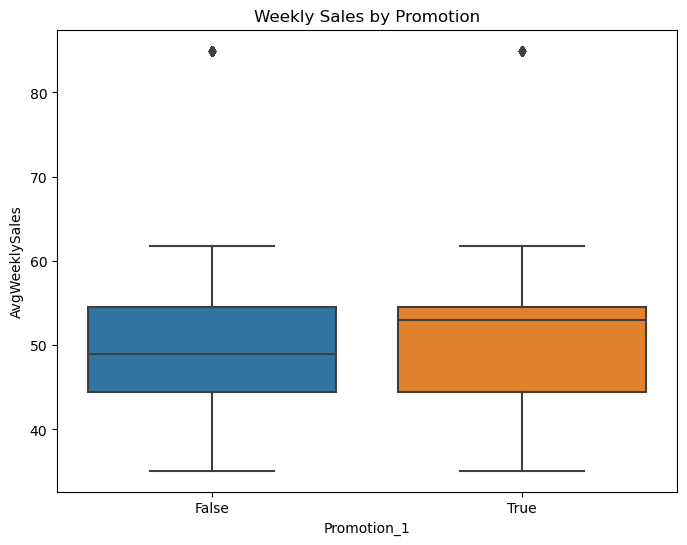

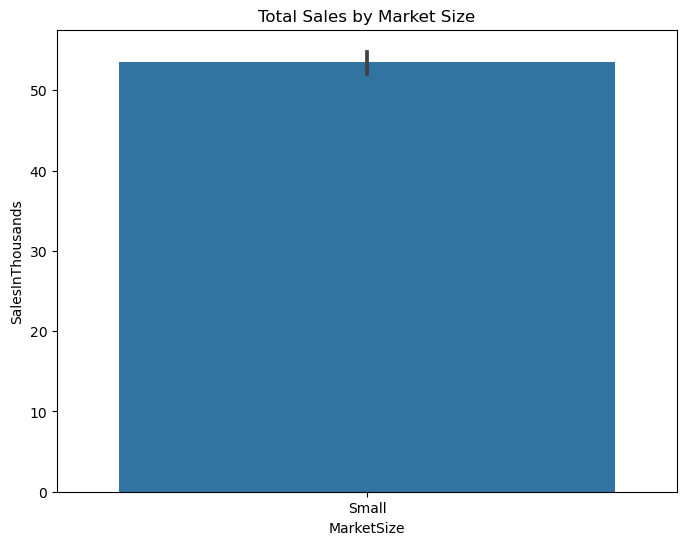

In [119]:
# Create a Seaborn boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Promotion_1", y="AvgWeeklySales", data=df)
plt.title('Weekly Sales by Promotion')

# Convert the Seaborn boxplot to an interactive Plotly plot
fig_boxplot = px.box(df, x="Promotion_1", y="AvgWeeklySales", title="Interactive Weekly Sales by Promotion")
fig_boxplot.update_layout(showlegend=False)

# Create a Seaborn bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="MarketSize", y="SalesInThousands", data=df)
plt.title('Total Sales by Market Size')

# Convert the Seaborn bar plot to an interactive Plotly plot
fig_barplot = px.bar(df, x="MarketSize", y="SalesInThousands", title="Interactive Total Sales by Market Size")
fig_barplot.update_layout(showlegend=False)

# Show the interactive plots
fig_boxplot.show()
fig_barplot.show()






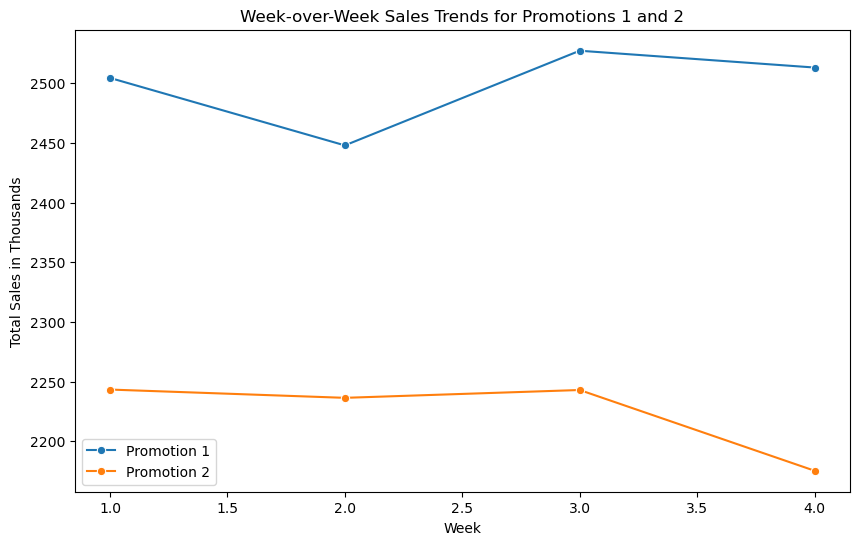

In [120]:
# Week-over-week trends
promotion1_sales = df[df['Promotion_1']==1].groupby('week')['SalesInThousands'].sum()
promotion2_sales = df[df['Promotion_2']==1].groupby('week')['SalesInThousands'].sum()

# Group the data by week and calculate total sales for Promotion 1 and Promotion 2
promotion1_weekly_sales = df[df['Promotion_1'] == 1].groupby('week')['SalesInThousands'].sum().reset_index()
promotion2_weekly_sales = df[df['Promotion_2'] == 1].groupby('week')['SalesInThousands'].sum().reset_index()

# Create a Seaborn line plot for Promotion 1
plt.figure(figsize=(10, 6))
sns.lineplot(data=promotion1_weekly_sales, x='week', y='SalesInThousands', label='Promotion 1', marker='o')

# Create a Seaborn line plot for Promotion 2
sns.lineplot(data=promotion2_weekly_sales, x='week', y='SalesInThousands', label='Promotion 2', marker='o')

# Set plot labels and title
plt.xlabel('Week')
plt.ylabel('Total Sales in Thousands')
plt.title('Week-over-Week Sales Trends for Promotions 1 and 2')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [121]:
# Data
promos = ['Promotion 1', 'Promotion 2', 'Promotion 3']
sales = [40000, 30000, 20000]

output_notebook()


# Create a ColumnDataSource
source = ColumnDataSource(data=dict(promos=promos, sales=sales))

# Create the figure with the specified height
p = figure(x_range=promos, height=350, title='Total Sales by Promotion',
           toolbar_location=None, tools="")

# Add bars to the figure
p.vbar(x='promos', top='sales', width=0.6, source=source, legend_field="promos",
       line_color='white', fill_color=factor_cmap('promos', palette=Spectral11, factors=promos))

# Customize plot properties
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = max(sales) + 5000
p.legend.title = 'Promotions'

# Show the interactive plot
show(p)

Loading BokehJS ...

In [122]:
# Data
df = pd.DataFrame({'Promo1': [25000, 28000, 31000, 33000], 
                   'Promo2': [20000, 18000, 22000, 21000]})

output_notebook()

# Create figure
p = figure(tools=[BoxZoomTool(), LassoSelectTool(), WheelZoomTool()], 
           width=800, height=600, 
           title='Weekly Sales Distribution')

# Add box plots
p.vbar(x=[1, 2], top=df['Promo1'], width=0.5, color='blue', legend_label='Promo1')
p.vbar(x=[1.5, 2.5], top=df['Promo2'], width=0.5, color='red', legend_label='Promo2')

# Legend
p.legend.location = 'top_left'
p.legend.background_fill_alpha = 0.5


# Styling
p.y_range.start = 0
p.xaxis.axis_label = 'Week'
p.yaxis.axis_label = 'Weekly Sales'
p.xgrid.grid_line_color = None

# Show result
show(p)

Loading BokehJS ...

In [123]:
# Data
weeks = [1, 2, 3, 4]
sales1 = [25000, 28000, 31000, 33000]
sales2 = [20000, 18000, 22000, 21000]


output_notebook()

# Create a Bokeh figure
p = figure(title='Weekly Sales Trend', x_axis_label='Weeks', y_axis_label='Weekly Sales')

# Add line glyphs for Promotion 1 and Promotion 2
p.line(weeks, sales1, legend_label='Promotion 1', line_width=2, line_color='blue')
p.line(weeks, sales2, legend_label='Promotion 2', line_width=2, line_color='red')

# Add a legend
p.legend.title = 'Promotions'

# Show the interactive plot
show(p)

Loading BokehJS ...

In [124]:
# Data
sizes = [50, 80, 100, 60, 120]
sales1 = [25000, 33000, 29000, 28000, 37000]
sales2 = [20000, 21000, 18000, 22000, 25000]


output_notebook()

df = pd.DataFrame({'size': sizes,
                   'sales1': sales1,
                   'sales2': sales2})

# Create the Bokeh output in a Jupyter Notebook (if you're using Jupyter)
output_notebook()

# Create the figure
p = figure(title='Store Size vs Sales',
           x_axis_label='Store Size',
           y_axis_label='Sales')

# Add heatmap
p.rect(x='size', y='sales1', width=5, height=5,
       color=Spectral5[0], source=df,
       hover_color='white', hover_alpha=0.8)

p.rect(x='size', y='sales2', width=5, height=5,
       color=Spectral5[2], source=df,
       hover_color='white', hover_alpha=0.8)

# Hover tool
hover = HoverTool(tooltips=[
    ('Store', '@size'),
    ('Sales', '@sales1{0,0}'),
    ('Promotion', '1')])

p.add_tools(hover)

# Create size category column
df['market_size'] = 'Small'
df.loc[df['size'] > 50, 'market_size'] = 'Medium'
df.loc[df['size'] > 100, 'market_size'] = 'Large'

# Define a color palette for the rectangles
palette = [Spectral5[0], Spectral5[2]]

# Plot rectangles
p.rect(x='size', y='sales1', width=10, height=3000,
       color=palette[0], alpha=0.8, legend_label='Promo1', source=df)

p.rect(x='size', y='sales2', width=10, height=3000,
       color=palette[1], alpha=0.8, legend_label='Promo2', source=df)

# Add size legend
p.extra_y_ranges = {'size': Range1d(start=0, end=200)}
p.circle(x='size', y='market_size', color='black', size=10, y_range_name='size',
         legend_label='Market Size', source=df)

# Customize legend
p.legend.location = 'top_left'
p.legend.background_fill_alpha = 0.5
p.legend.label_text_font_size = '8pt'

# Show the interactive plot
show(p)

Loading BokehJS ...

Loading BokehJS ...

In [132]:
# Time series forecasting
X = df['TotalSales'].values.reshape(-1,1)
y = df['AvgWeeklySales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate RMSE and R2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2: {r2}')


RMSE: 7.9928953982837285
R2: 0.7183445582381578


In [126]:
# Forecast future weeks
future_weeks = np.array([[5],[6],[7],[8]])
future_sales = model.predict(future_weeks)

print(f'Forecast Sales: {future_sales}')


Forecast Sales: [29.35384931 29.36092064 29.36799197 29.3750633 ]
